<a href="https://colab.research.google.com/github/m-edal/Earth-Env-DS-MSc-Course/blob/main/labs/W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code for Assessment of EART60702 Project 1 (Group 2)**

- Earth and Environmental Data Science (EART60702)
- Presented on: 24 February, 2026

**Group members:**
- 1. Xinxi Xue
- 2. Qianhao Li
- 3. Xinhao Zhou
- 4. Emmanuel Julius

## 1. Importing packages and datasets
**NumPy, Pandas, and Project_1 datasets:**


In [1]:
# 1.1 Importing numpy and pandas package
import numpy as np
import pandas as pd

In [2]:
# 1.2 Checking packages' versions
print(np.__version__)
print(pd.__version__)

2.0.2
2.2.2


In [3]:
# 1.3 Importing datasets as xarray from the csv file, read by pandas and display first 5 rows of the dataframe.
import xarray as xr

In [4]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving project_1.csv to project_1.csv


In [5]:
import io

# Find the actual filename for 'project_1.csv' in the uploaded dictionary
project_1_filename = None
for key in uploaded.keys():
    if key == 'project_1.csv': # Changed to exact match for 'project_1.csv'
        project_1_filename = key
        break

if project_1_filename:
    # Get the content of the identified 'project_1.csv' from the uploaded dictionary
    csv_data = uploaded[project_1_filename].decode('utf-8')

    # Read the CSV data into a pandas DataFrame
    df_project1 = pd.read_csv(io.StringIO(csv_data))

    print(f"Successfully loaded '{project_1_filename}' into df_project1.")
    # Display the first 5 rows of the DataFrame
    display(df_project1.head())

Successfully loaded 'project_1.csv' into df_project1.


,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,02/01/2006 00:00,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5,NaN,NaN,NaN
1,03/01/2006 00:00,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5,NaN,NaN,NaN
2,04/01/2006 00:00,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5,NaN,NaN,NaN
3,05/01/2006 00:00,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5,NaN,NaN,NaN
4,06/01/2006 00:00,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5,NaN,NaN,NaN


#2. Pre-processing of the datasets
**Dropping the unnamed columns, setting time at an appropriate datetime index and renaming parameters for clarity**

In [8]:
# 2.1 Identify and drop columns that contain 'Unnamed' in their name
unnamed_cols = [col for col in df_project1.columns if 'Unnamed' in col]

# Drop these columns from the DataFrame
df_project1 = df_project1.drop(columns=unnamed_cols)

# Display the first few rows to confirm the changes
display(df_project1.head())

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,02/01/2006 00:00,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,03/01/2006 00:00,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,04/01/2006 00:00,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,05/01/2006 00:00,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,06/01/2006 00:00,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [10]:
df_project2 = df_project1.copy()
df_project2['time'] = pd.to_datetime(df_project2['time'], format='%d/%m/%Y %H:%M')
display(df_project2.head())

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,2006-01-02,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [12]:
#2.3 Renaming parameters for clarity and daataset summary
df_project3 = df_project2.rename(columns={'time': 'Time', 'TREFMXAV_U': 'Max Temp', 'FLNS': 'Longwave Rad', 'FSNS': 'Shortwave Rad', 'PRECT': 'Precipitation Rate', 'PRSN': 'Snowfall', 'QBOT': 'Specific Humidity', 'TREFHT': 'Air Temp', 'UBOT': 'E-W Wind Speed', 'VBOT': 'N-S Wind Speed','lat': 'Lat', 'lon': 'Lon'})

display(df_project3.head())

#Summary;
num_rows, num_cols = df_project3.shape
print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_cols}")

,Time,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed,Lat,Lon
0,2006-01-02,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


Total number of rows: 27374
Total number of columns: 12


#3. Exploratory Data Analysis (EDA)

In [13]:
#3.1 Checking for missing values
missing_data = df_project3.isnull().sum()
print(missing_data)

Time                  0
Max Temp              0
Longwave Rad          0
Shortwave Rad         0
Precipitation Rate    0
Snowfall              0
Specific Humidity     0
Air Temp              0
E-W Wind Speed        0
N-S Wind Speed        0
Lat                   0
Lon                   0
dtype: int64


In [14]:
#3.2 Checking for duplicate values
duplicate_rows = df_project1[df_project3.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []


In [15]:
#3.3 Showing key statistics
display(df_project3.drop(columns=['Time', 'Lat', 'Lon']).describe())

,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000
mean,288.836179,42.995679,97.026261,3.379656e-08,3.049255e-10,0.006523,284.876413,1.176320,1.503084
std,5.246468,21.451927,75.062880,4.986414e-08,4.704584e-09,0.002126,4.992277,3.066843,2.940138
min,274.153200,0.611385,2.819259,-4.670000e-28,-6.260000e-21,0.001855,268.938400,-9.739025,-8.991429
25%,284.719465,26.157544,31.037187,2.130000e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405
50%,288.299895,40.777005,78.443183,1.310000e-08,1.210000e-21,0.006211,284.537575,1.488009,1.593354
75%,292.869525,57.113572,149.332133,4.637500e-08,2.350000e-16,0.007947,288.900110,3.390555,3.634500
max,311.257260,111.851400,310.191700,7.750000e-07,2.330000e-07,0.015222,303.117980,10.234506,11.178102


Two unusual observations: Minimum values for Precipitation rate and Snowfall are NEGATIVE. (These are scalar quantities, can't be -ve, unlike wind speed which is common to have a negative value).

- Those values are inspected and once found to be very small negative numbers, are corrected by setting their values to zero:

In [16]:
#Setting negative precipitation and snowfall values to zero.
df_project4 = df_project3.copy() # Initialize df_project4 as a copy of df_project3
df_project4.loc[df_project4['Precipitation Rate'] < 0, 'Precipitation Rate'] = 0
print("Negative 'Precipitation Rate' values have been set to 0.")
df_project4.loc[df_project4['Snowfall'] < 0, 'Snowfall'] = 0
print("Negative 'Snowfall' values have been set to 0.")

# Let's verify by checking the summary statistics again
display(df_project4.drop(columns=['Time', 'Lat', 'Lon']).describe())

Negative 'Precipitation Rate' values have been set to 0.
Negative 'Snowfall' values have been set to 0.


,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000
mean,288.836179,42.995679,97.026261,3.379656e-08,3.049255e-10,0.006523,284.876413,1.176320,1.503084
std,5.246468,21.451927,75.062880,4.986414e-08,4.704584e-09,0.002126,4.992277,3.066843,2.940138
min,274.153200,0.611385,2.819259,0.000000e+00,0.000000e+00,0.001855,268.938400,-9.739025,-8.991429
25%,284.719465,26.157544,31.037187,2.130000e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405
50%,288.299895,40.777005,78.443183,1.310000e-08,1.210000e-21,0.006211,284.537575,1.488009,1.593354
75%,292.869525,57.113572,149.332133,4.637500e-08,2.350000e-16,0.007947,288.900110,3.390555,3.634500
max,311.257260,111.851400,310.191700,7.750000e-07,2.330000e-07,0.015222,303.117980,10.234506,11.178102


Other basic EDA analyses can be placed here.

## Dropping other parameters and retain Air Temperature, Precipitation Rate and Specific Humidity.

In [17]:
#Selecting Time, Air Temperature Humidity and Precipitation Rate (as paremeters of our interest)
df_project5 = df_project4[['Time', 'Air Temp', 'Precipitation Rate', 'Specific Humidity']]
#Renaming parameters (Abbreviation and Units)
df_project5 = df_project5.rename(columns={'Air Temp': 'Temp (K)', 'Precipitation Rate': 'Precip (m/s)', 'Specific Humidity':'Humid (Kg/Kg)'})
#Display
display(df_project5.head())


,Time,Temp (K),Precip (m/s),Humid (Kg/Kg)
0,2006-01-02,279.14288,4.660000e-09,0.004769
1,2006-01-03,281.14865,8.050000e-08,0.006271
2,2006-01-04,281.22380,2.910000e-09,0.005782
3,2006-01-05,278.39767,7.430000e-11,0.004277
4,2006-01-06,278.06378,6.890000e-12,0.003990


In [18]:
#3.3 Showing key statistics
display(df_project5.drop(columns=['Time']).describe())

,Temp (K),Precip (m/s),Humid (Kg/Kg)
count,27374.000000,2.737400e+04,27374.000000
mean,284.876413,3.379656e-08,0.006523
std,4.992277,4.986414e-08,0.002126
min,268.938400,0.000000e+00,0.001855
25%,280.987885,2.130000e-09,0.004860
50%,284.537575,1.310000e-08,0.006211
75%,288.900110,4.637500e-08,0.007947
max,303.117980,7.750000e-07,0.015222


## 4. Analyses
**Both Matplotlib and Seaborn has been used**

In [20]:
#Inserting tools for analyses and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Versions of matplotib and seaborn
print(matplotlib.__version__)
print(sns.__version__)


3.10.0
0.13.2


###4.1 Temperature, precipitation and humidity over time (Trends).
- Annual mean values have been used

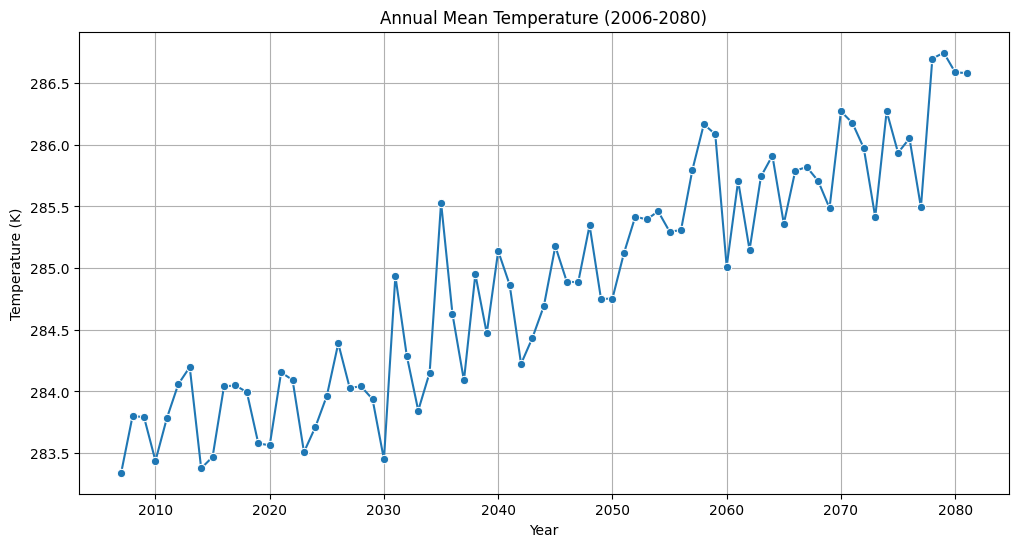

In [21]:
#Trend for annual mean temperature.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean temperature
annual_mean_temp = df_project5_indexed['Temp (K)'].resample('YE').mean().reset_index()

# Plotting the annual mean temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Temp (K)', data=annual_mean_temp, marker='o')
plt.title('Annual Mean Temperature (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()

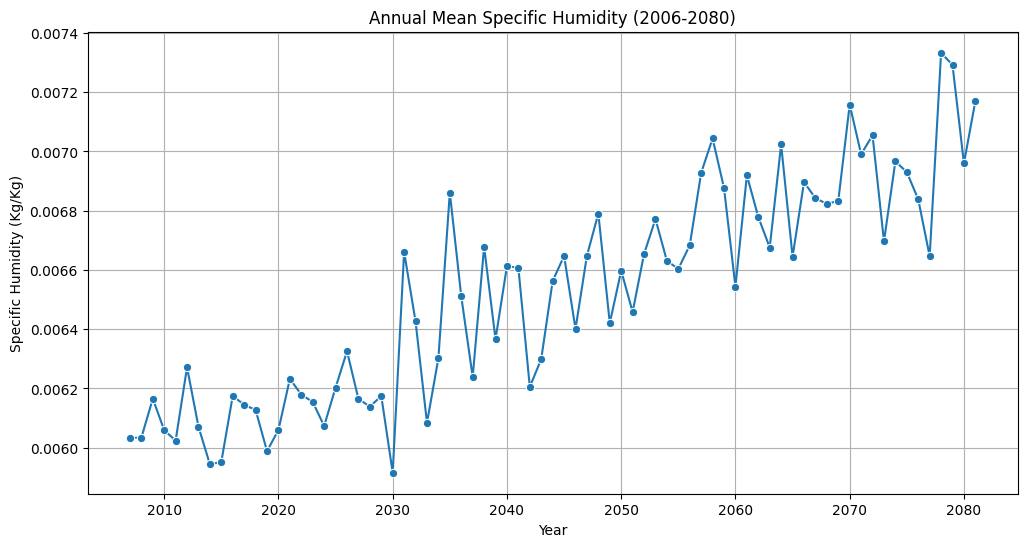

In [22]:
#Trend for annual mean specific humidity.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean specific humidity
annual_mean_humid = df_project5_indexed['Humid (Kg/Kg)'].resample('YE').mean().reset_index()

# Plotting the annual mean temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Humid (Kg/Kg)', data=annual_mean_humid, marker='o')
plt.title('Annual Mean Specific Humidity (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Specific Humidity (Kg/Kg)')
plt.grid(True)
plt.show()

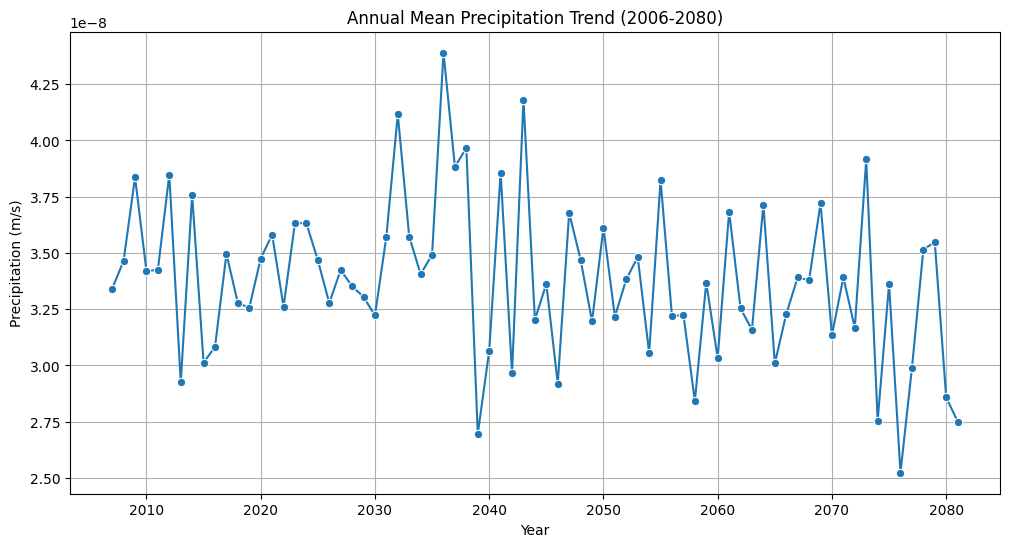

In [23]:
#Trend for annual mean precipitation.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean precipitation
annual_mean_precip = df_project5_indexed['Precip (m/s)'].resample('YE').mean().reset_index()

# Plotting the annual mean precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Precip (m/s)', data=annual_mean_precip, marker='o')
plt.title('Annual Mean Precipitation Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Precipitation (m/s)')
plt.grid(True)
plt.show()

### 4.2 Correlation between parameters

4.2.1 Temperature vs Humidity

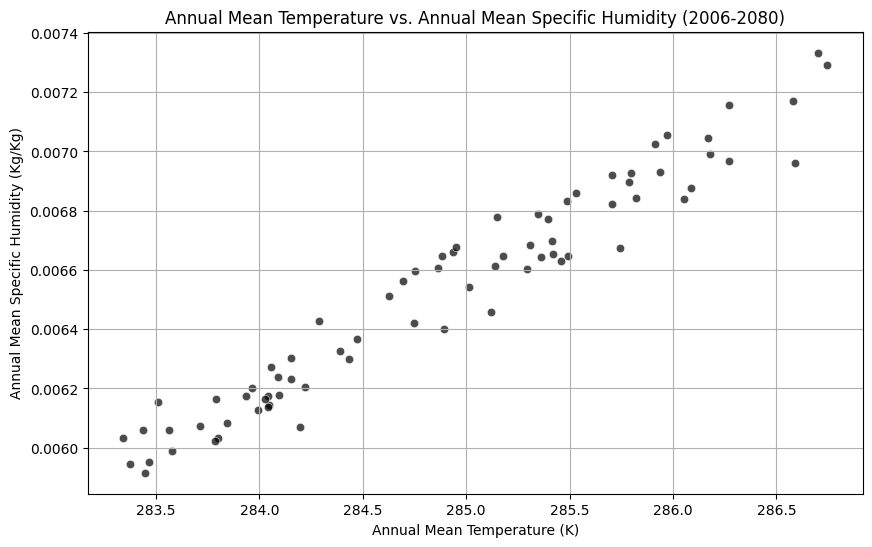

In [93]:
# Plotting Annual Mean Temperature vs. Annual Mean Specific Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp (K)', y='Humid (Kg/Kg)', data=annual_temp_humid, alpha=0.7, color='black')
plt.title('Annual Mean Temperature vs. Annual Mean Specific Humidity (2006-2080)')
plt.xlabel('Annual Mean Temperature (K)')
plt.ylabel('Annual Mean Specific Humidity (Kg/Kg)')
plt.grid(True)
plt.show()

In [96]:
# Merge annual mean temperature and specific humidity dataframes
annual_temp_humid = pd.merge(annual_mean_temp, annual_mean_humid, on='Time')

# Calculate correlation between Annual Mean Temperature and Annual Mean Specific Humidity
correlation_annual_temp_humid = annual_temp_humid['Temp (K)'].corr(annual_temp_humid['Humid (Kg/Kg)'])
print(f"Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: {correlation_annual_temp_humid}")

Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: 0.9722094955948025


- Pearson and Spearman correlation tests (Temperature vs Humidity) will be inserted here....

4.2.2 Temperature vs Precipitation

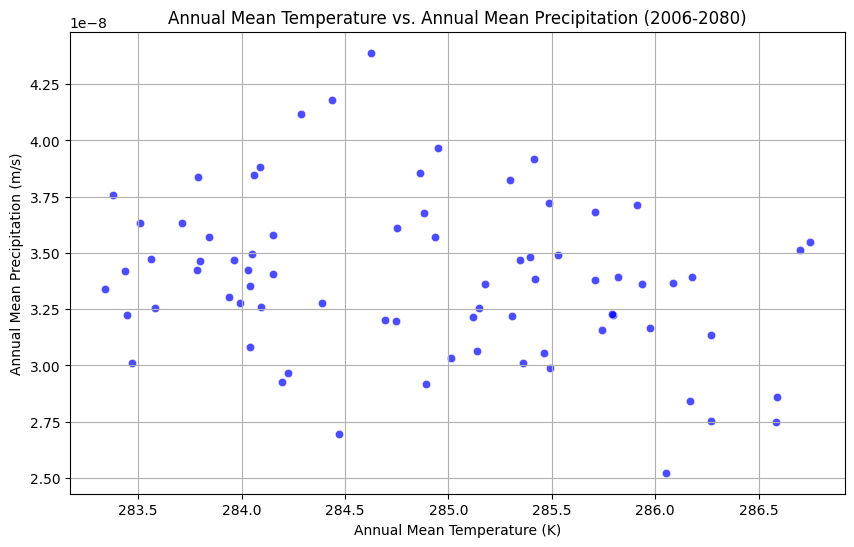

In [97]:
# Merge annual mean temperature and precipitation dataframes
annual_temp_precip = pd.merge(annual_mean_temp, annual_mean_precip, on='Time')

# Plotting Annual Mean Temperature vs. Annual Mean Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp (K)', y='Precip (m/s)', data=annual_temp_precip, alpha=0.7, color='blue')
plt.title('Annual Mean Temperature vs. Annual Mean Precipitation (2006-2080)')
plt.xlabel('Annual Mean Temperature (K)')
plt.ylabel('Annual Mean Precipitation (m/s)')
plt.grid(True)
plt.show()

In [108]:
# Calculate correlation between Annual Mean Temperature and Annual Mean Precipitation
correlation_annual_temp_precip = annual_temp_precip['Temp (K)'].corr(annual_temp_precip['Precip (m/s)'])
print(f"Correlation between Annual Mean Temperature and Annual Mean Precipitation: {correlation_annual_temp_precip}")

Correlation between Annual Mean Temperature and Annual Mean Precipitation: -0.25815374895586257


- Pearson and Spearman correlation tests (Temperature vs Precipitation) will be inserted here....

4.2.3 Precipitation vs Humidity

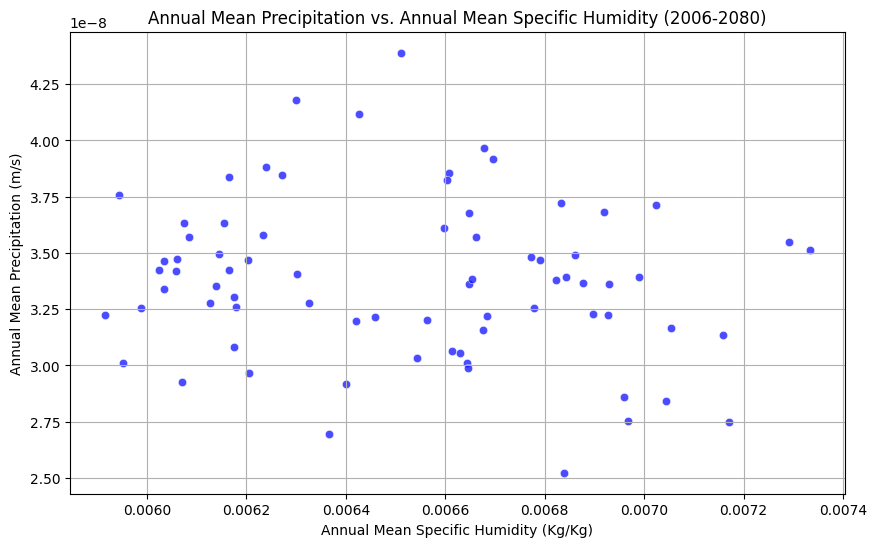

In [118]:
# Merge annual mean precipitation and annual mean humidity dataframes
annual_precip_humid = pd.merge(annual_mean_precip, annual_mean_humid, on='Time')

# Plotting Annual Mean Precipitation vs. Annual Mean Specific Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humid (Kg/Kg)', y='Precip (m/s)', data=annual_precip_humid, alpha=0.7, color='blue')
plt.title('Annual Mean Precipitation vs. Annual Mean Specific Humidity (2006-2080)')
plt.xlabel('Annual Mean Specific Humidity (Kg/Kg)')
plt.ylabel('Annual Mean Precipitation (m/s)')
plt.grid(True)
plt.show()

In [119]:
# Calculate correlation between Annual Mean Precipitation and Annual Mean Humidity
correlation_annual_precip_humid = annual_precip_humid['Precip (m/s)'].corr(annual_precip_humid['Humid (Kg/Kg)'])
print(f"Correlation between Annual Mean Precipitation and Annual Mean Humidity: {correlation_annual_precip_humid}")

Correlation between Annual Mean Precipitation and Annual Mean Humidity: -0.14129019863687814


- Pearson and Spearman correlation tests (Precipitation vs Humidity) will be inserted here....

### 4.3 Extreme events

Extreme rainfall threshold is defined using the 95th percentile of non-zero daily precipitation values.

In [115]:
#Rainfall extremes frequence and intensity
# 1. Filter daily_precipitation for non-zero values
non_zero_daily_precipitation = daily_precipitation[daily_precipitation['Precip (m/s)'] > 0]

# 2. Calculate the 95th percentile of the 'Precip (m/s)' column from non_zero_daily_precipitation
EXTREME_RAINFALL_THRESHOLD = non_zero_daily_precipitation['Precip (m/s)'].quantile(0.95)
print(f"Extreme rainfall threshold (95th percentile): {EXTREME_RAINFALL_THRESHOLD} m/s")

# 3. Identify the extreme rainfall days
extreme_rainy_days = daily_precipitation['Precip (m/s)'] > EXTREME_RAINFALL_THRESHOLD
print(f"Number of extreme rainy days identified: {extreme_rainy_days.sum()}")

# 4. Calculate the annual frequency of extreme rainfall events
annual_extreme_rainfall_frequency = extreme_rainy_days.resample('YE').sum().to_frame(name='Extreme Rainfall Frequency (days/year)')
print("Annual extreme rainfall frequency calculated successfully.")
display(annual_extreme_rainfall_frequency.head())

# 5. Calculate the annual average intensity of extreme rainfall events
extreme_rainy_day_precipitation = daily_precipitation[extreme_rainy_days]
annual_extreme_rainfall_intensity = extreme_rainy_day_precipitation['Precip (m/s)'].resample('YE').mean().to_frame(name='Extreme Rainfall Intensity (m/s)')
print("Annual extreme rainfall intensity calculated successfully.")
display(annual_extreme_rainfall_intensity.head())

Extreme rainfall threshold (95th percentile): 1.33e-07 m/s
Number of extreme rainy days identified: 1351
Annual extreme rainfall frequency calculated successfully.


,Extreme Rainfall Frequency (days/year)
Time,
2006-12-31,17
2007-12-31,15
2008-12-31,19
2009-12-31,14
2010-12-31,18


Annual extreme rainfall intensity calculated successfully.


,Extreme Rainfall Intensity (m/s)
Time,
2006-12-31,1.884118e-07
2007-12-31,1.863333e-07
2008-12-31,2.224211e-07
2009-12-31,2.077857e-07
2010-12-31,1.930000e-07


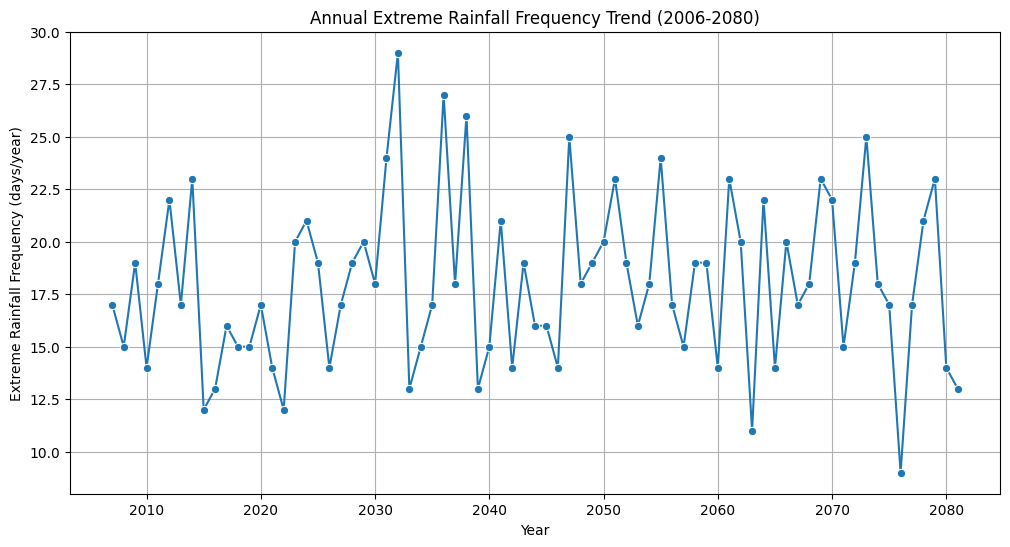

In [91]:
# 1. Plotting Annual Extreme Rainfall Frequency Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Extreme Rainfall Frequency (days/year)', data=annual_extreme_rainfall_frequency.reset_index(), marker='o')
plt.title('Annual Extreme Rainfall Frequency Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Extreme Rainfall Frequency (days/year)')
plt.grid(True)
plt.show()

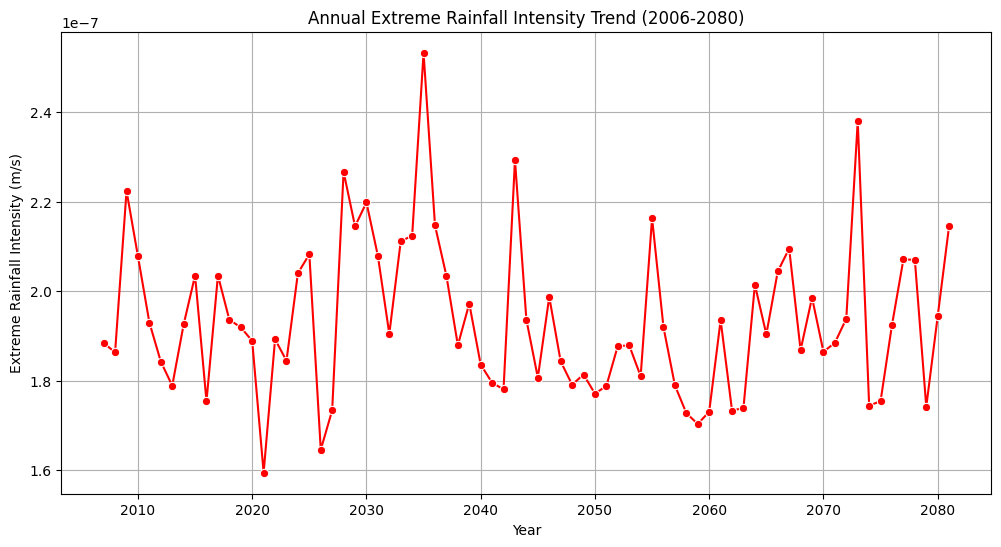

In [92]:
# 2. Plotting Annual Extreme Rainfall Intensity Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Extreme Rainfall Intensity (m/s)', data=annual_extreme_rainfall_intensity.reset_index(), marker='o', color='red')
plt.title('Annual Extreme Rainfall Intensity Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Extreme Rainfall Intensity (m/s)')
plt.grid(True)
plt.show()

## End of code


.............

## Analysis and Summary of Extreme Rainfall Trends

### Key Findings from the Plots:

1.  **Annual Extreme Rainfall Frequency Trend (2006-2080)**:
    *   Upon reviewing the 'Annual Extreme Rainfall Frequency Trend (2006-2080)' plot, the number of extreme rainfall days per year appears to be relatively **stable with notable year-to-year fluctuations**. There isn't a clear long-term increasing or decreasing trend visible, suggesting that the occurrence of extreme rainfall events remains fairly consistent in terms of count.

2.  **Annual Extreme Rainfall Intensity Trend (2006-2080)**:
    *   The 'Annual Extreme Rainfall Intensity Trend (2006-2080)' plot indicates a **slight, but discernible, increasing trend** in the average intensity of extreme rainfall events. While there are inter-annual variations, the overall trajectory suggests that when extreme rainfall events occur, they tend to be more intense over time.

### Implications for Climate Resilience and Water Management:

The observed trends, particularly the stable frequency coupled with increasing intensity of extreme rainfall events, have several significant implications:

*   **Increased Flood Risk**: Higher intensity rainfall, even if the frequency remains similar, means more water falls in a shorter period. This can overwhelm drainage systems, increase surface runoff, and lead to more frequent and severe flash floods, particularly in urban areas or regions with insufficient infrastructure.

*   **Agricultural Impacts**: Intense rainfall can cause soil erosion, damage crops, and lead to nutrient leaching, impacting agricultural productivity. While overall precipitation might be stable, its delivery in more concentrated bursts can be detrimental to delicate ecosystems and farming practices.

*   **Water Resource Management**: Although the total number of rainy days might not be changing significantly, the increased intensity could paradoxically lead to water scarcity issues if the water cannot be effectively captured and stored. Rapid runoff reduces groundwater recharge, and existing reservoirs might struggle to manage sudden large inflows and outflows efficiently.

*   **Infrastructure Strain**: Roads, bridges, and other critical infrastructure designed for historical rainfall patterns may not be robust enough to withstand the increasing intensity of extreme events. This necessitates significant investment in upgrading and adapting infrastructure to be more resilient to future climate conditions.

*   **Ecosystem Impacts**: Intense rainfall can disrupt natural ecosystems, leading to increased erosion in natural habitats, altering river flows, and impacting aquatic life due to sudden changes in water levels and sediment transport.

**Conclusion**: The analysis of extreme rainfall trends reveals a critical challenge: while the frequency of extreme events may not be dramatically changing, their intensity is on the rise. This shift requires proactive strategies for climate change adaptation, focusing on robust flood defense, sustainable agricultural practices, efficient water harvesting, and resilient infrastructure development to mitigate the adverse effects and enhance overall climate resilience.

*Appendices*

##Alternative Visualization: Regression Plot for Temperature vs. Humidity
Regression plots for example the 'Temperature vs. Specific Humidity' can also be produced. They include a regression line and confidence interval. see and example here

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Annual Mean Temperature vs. Annual Mean Specific Humidity with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Temp (K)', y='Humid (Kg/Kg)', data=annual_temp_humid, scatter_kws={'alpha':0.7, 'color':'black'}, line_kws={'color':'red'})
plt.title('Annual Mean Temperature vs. Annual Mean Specific Humidity (Regression Plot)')
plt.xlabel('Annual Mean Temperature (K)')
plt.ylabel('Annual Mean Specific Humidity (Kg/Kg)')
plt.grid(True)
plt.show()

## Statistical Tests for Correlation

In [114]:
#PEARSON STATISTICAL TEST
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_project5['Temp (K)'], df_project5['Humid (Kg/Kg)'])

print(f"Pearson Correlation Coefficient between Temperature and Specific Humidity: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between Temperature and Specific Humidity.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between Temperature and Specific Humidity.")

Pearson Correlation Coefficient between Temperature and Specific Humidity: 0.8762
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant linear relationship between Temperature and Specific Humidity.


In [116]:
#SPEARMAN STATISTICAL TEST
from scipy.stats import spearmanr

# Perform Spearman correlation test
spearman_coefficient, spearman_p_value = spearmanr(df_project5['Temp (K)'], df_project5['Humid (Kg/Kg)'])

print(f"Spearman Correlation Coefficient between Temperature and Specific Humidity: {spearman_coefficient:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if spearman_p_value < alpha:
    print(f"Since the p-value ({spearman_p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant monotonic relationship between Temperature and Specific Humidity.")
else:
    print(f"Since the p-value ({spearman_p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant monotonic relationship between Temperature and Specific Humidity.")

Spearman Correlation Coefficient between Temperature and Specific Humidity: 0.8856
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant monotonic relationship between Temperature and Specific Humidity.
